### Single Layer Perceptron in Numpy ###
1.Iswariya Manivannan<br>
2.Sathiya Ramesh

In [6]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset= dsets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset= dsets.MNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display
np.random.seed(1)


In [8]:
# Initial settings
num_epoch = 500
learning_rate = 1e-6
batch_size=20

In [9]:
# Widgets for learning rate and no. of epochs
def Display_func(alpha,Epoch):

    global learning_rate
    learning_rate = float(alpha)
    global num_epoch
    num_epoch = Epoch
    
    print(f"Current learning_rate is {alpha}")

    print(f"Number of Epoch - {Epoch}")

    return (learning_rate,Epoch)



y=interactive(Display_func,alpha=widgets.RadioButtons(

    options=['1e-5', '1e-6', '1e-7', '1e-8', '1e-9' ],
    value='1e-6',
    description='LearningRate',
    disabled=False),Epoch=widgets.IntSlider(min=100,max=1000,step=20,value=500))

display(y)


interactive(children=(RadioButtons(description='LearningRate', index=1, options=('1e-5', '1e-6', '1e-7', '1e-8', '1e-9'), value='1e-6'), IntSlider(value=500, description='Epoch', max=1000, min=100, step=20), Output()), _dom_classes=('widget-interact',))

In [10]:
class Single_layer_perceptron:
    
    def __init__(self, n_x, n_y):
        
        self.input_layer_size = n_x
        self.ouput_layer_size = n_y
    
    def weight_initialization(self):
        
        W_1 = np.random.randn(self.ouput_layer_size, self.input_layer_size)*0.001
        B_1 = np.zeros([self.ouput_layer_size, 1])

        parameters = [W_1, B_1]
        return parameters
                                            
    
    
    # Function for Softmax outputs
    def softmax(self, Z):
        


        return np.exp(Z)/np.sum(np.exp(Z), axis =0)
    
    
    # Gradient of softmax function
    def softmax_prime(self, Z_2, y_hat): 
        

        return self.softmax(Z_2) * (1 - self.softmax(Z_2))
                        
     
            
    def Forward_prop(self, X, Y, parameters):
        

        W_1, B_1 = parameters
        Z_1 = np.dot(W_1, X) + B_1
        A_1 = self.softmax(Z_1)
        
        #assert (y_hat.shape == Y.shape)
        cache = [Z_1, A_1]
                                            
        return cache
                                            
    def Cost_function(self, Y, y_hat, parameters, lambd = 0):
        
        W_1, B_1 = parameters
        m = Y.shape[-1]
        cost = np.square(Y - y_hat)
        
        cost = np.sum(cost, axis = 0, keepdims= True).mean(axis = 1)/2
        L2_cost = np.sum(np.square(W_1))*(lambd/(2*m))
        cost = cost + L2_cost
        cost = np.squeeze(cost)
        return cost
                                            
    
    # Function for Backward Propagation
    def Backward_prop(self, parameters, cache, X, Y, lambd = 0):
        
        m = X.shape[1]
        
        W_1, B_1 = parameters
        Z_1, A_1= cache
        y_hat = A_1
                                            
        dZ_1 = -(Y - y_hat)*(self.softmax_prime(Z_1, y_hat))
        dW_1 = (1.0/m)*(np.dot(dZ_1, X.T)) + (lambd/m)*W_1
        dB_1 = (1.0/m)*(np.sum(dZ_1, axis = 1, keepdims= True))
        

        
        assert (dW_1.shape == W_1.shape)
        assert (dB_1.shape == B_1.shape)

        
        delta_weights = [dW_1, dB_1]
        
        return delta_weights
    
        
    # Function to update the parameters using Gradient Descent  
    def Parameter_update(self, parameters, delta_weights, learning_rate):
        
        dW_1, dB_1 = delta_weights
        W_1, B_1= parameters
        
        W_1 = W_1 - learning_rate*dW_1
        B_1 = B_1 - learning_rate*dB_1

        
        params = [W_1, B_1]
        
        return params
    
    
    # Function to calculate the Accuracy of prediction  
    def Accuracy(self, predictions, Y_test):
    
        accuracy = np.mean(predictions == Y_test) * 100
    
        return accuracy
    
    
    # Function to calculate the output labels of the test data
    def Predict(self, parameters, X_test, Y_test):
    
    
        y_hat, cache = model.Forward_prop(X_test, Y_test, parameters)

        prediction = np.argmax(y_hat, axis=0)

        return prediction

In [11]:
model = Single_layer_perceptron(784, 10)


lambd = 0           # Lambda set to 0. L2 regularization not used.
num_steps = (len(train_dataset)) // batch_size

total_cost = []
train_acc = []
test_acc = []

# Fetching the training data
X_train=train_dataset.train_data.numpy()
Y_train=train_dataset.train_labels.numpy()
parameters = model.weight_initialization()

# Fetching the test data 
X_test = test_dataset.test_data.numpy()
X_test = X_test.reshape([10000, 784]).T
Y_test = test_dataset.test_labels.numpy().T

# Note: Test data is used ONLY for Accuracy calculation and will not be used during training

for i in range(0, num_epoch):


    for step in range(num_steps):
        
        one_hot = np.zeros((20,10))

        offset = (step * batch_size) % (len(train_dataset) - batch_size)

        X_batch = X_train[offset:(offset + batch_size), :].reshape(20,784)

        Y_batch = Y_train[offset:(offset + batch_size)].reshape(20,1)
        
        X_batch = X_batch.T
        Y_batch = Y_batch.T
        
        #One hot encoding of the labels
        one_hot[np.arange(Y_batch.shape[1]), Y_batch] = 1 
        Y_batch = one_hot.T

        #Forward Propagation
        cache = model.Forward_prop(X_batch, Y_batch, parameters)
        y_hat = cache[-1]
        
        #Calculating the cost
        cost = model.Cost_function(Y_batch, y_hat, parameters, lambd)

        #Backward Propagation
        delta_weights = model.Backward_prop(parameters, cache, X_batch, Y_batch, lambd)

        #Updating the parameters
        parameters = model.Parameter_update(parameters, delta_weights, learning_rate)
        
    total_cost.append(cost)
    
    # Predicting the labels for the train data using the trained parameters
    Y_pred = model.Predict(parameters, X_train.reshape(60000, 784).T, Y_train.reshape(60000, 1).T)
    
    # Calculating the Training accuracy of the model
    train_acc.append(model.Accuracy(Y_pred, Y_train.reshape(60000, 1).T))
    
    # Predicting the labels for the test data using the trained parameters
    Y_pred_test = model.Predict(parameters, X_test, Y_test)

    # Calculating the accuracy of the model
    test_acc.append(model.Accuracy(Y_pred_test, Y_test))
    
    if i%20 == 0:
        print(f'Epoch {i}   Cost: {cost}    Training Acc: {train_acc[i]:.5f}%   Test Acc: {test_acc[i]:.5f}%')
        
  

Epoch 0   Cost: 0.07857429745396949    Training Acc: 83.40333%   Test Acc: 84.85000%


KeyboardInterrupt: 

Text(0,0.5,'Percentage Accuracy')

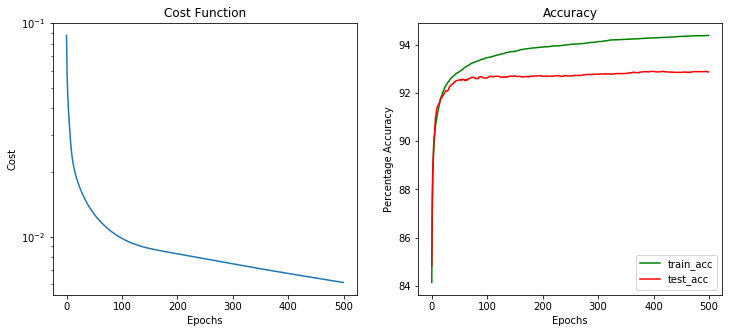

In [49]:
#Plotting the cost function
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
ax.set_title("Cost Function")
ax.plot(total_cost, '-')
ax.set_xlabel("Epochs")
ax.set_ylabel("Cost")
ax.set_yscale('log')

ax1 = fig.add_subplot(1,2,2)
ax1.set_title("Accuracy")
ax1.plot(train_acc, '-', color='green')
ax1.plot(test_acc, '-', color='red')
ax1.legend(['train_acc', 'test_acc'],loc='best')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Percentage Accuracy")


In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_test)
print(cm)

[[ 957    0    0    3    2    2    7    4    4    1]
 [   0 1113    5    1    0    1    4    1   10    0]
 [   7    7  928   18    7    4    9   10   36    6]
 [   1    1   12  927    1   23    4    9   23    9]
 [   3    1    4    1  907    0   13    4   11   38]
 [   8    2    1   30    7  791   11    6   30    6]
 [  10    2    6    2    6   20  907    2    3    0]
 [   2    6   21    9    6    2    0  951    5   26]
 [   5    7    6   21    5   28   10    9  874    9]
 [   7    5    0    9   18    5    1   18   13  933]]


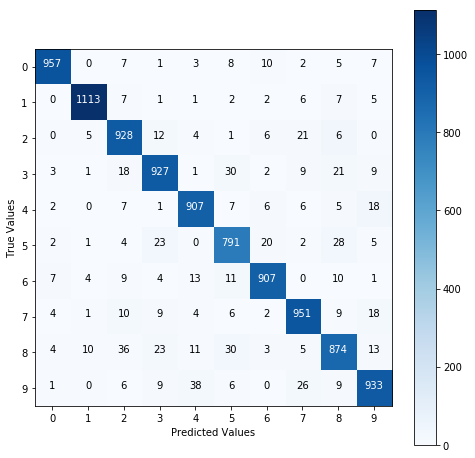

In [51]:
import itertools
def plot_confusion_matrix(cm, target_labels):
    
    cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8,8))
    plt.imshow(cm, cmap = cmap, interpolation = 'nearest')
    plt.colorbar()
    
    tick_marks = np.arange(len(target_labels))
    plt.xticks(tick_marks, target_labels)
    plt.yticks(tick_marks, target_labels)
    
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
    
    threshold = cm.max()/2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        plt.text(i, j, f'{cm[i, j]}' , horizontalalignment = 'center', 
                 color="white" if cm[i, j] > threshold else "black")

plot_confusion_matrix(cm, np.arange(10))
